
<h1 align=center><font size = 5>Análise exploratória de dados</font></h1>

A célula abaixo apresenta um exemplo conexão através de um link

Neste link você pode ter acesso a uma plataforma de ciências de dados com recursos gratuitos (checar no link conteúdos, modalidade e serviços disponiblizados sem custo)


<div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/DA0101EN_NotbookLink_Top"><img src = "https://www.nasuni.com/wp-content/uploads/2017/06/ibm-cloud.png" width = 250, align = "center"></a>
  <h1 align=center>

### Quais as características mais que tem o maior impacto no preço do carro?

## 1. Importando os dados 

#### preparando o ambiente com as bibliotecas Pandas e Numpy

In [1]:
import pandas as pd
import numpy as np

Agora vamos importar a base de dados de um repositório público

In [2]:
path='https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv'

df = pd.read_csv(path)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 2. Analizando padrões de características utilizando exploração visual

Primeiramente vamos importar bibliotecas de análise gráfica chamadas Matplotlib e Seaborn

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### Como escolher o método de visualização certo?

Ao visualizar variáveis ​​**individuais**, é importante primeiro entender o tipo de variável para encontrar o método de visualização correto para essa variável.


In [4]:
# liste os tipos de dados para cada coluna
df.dtypes

Unnamed: 0             int64
symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Questão  #1: </h1>

<b> Qual é o tipo de dado da coluna "peak-rpm"? </b>
</div>

  <div align="right">
<a href="#q1" class="btn btn-default" data-toggle="collapse">Clique aqui para a solução</a>

</div>
<div id="q1" class="collapse">
```
float64
```
</div>


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Questão 2  #2: </h1>

<b> Encontre a correlação entre as seguintes colunas: bore, stroke,compression-ratio , e horsepower.
<br>Dica: se voce quiser selecionar estas colunas use esta sintaxe: df[['bore','stroke' ,'compression-ratio','horsepower']]</bbr>  </b>
</div>

In [6]:
df[['bore','stroke' ,'compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


 <div align="right">
<a href="#q2" class="btn btn-default" data-toggle="collapse">Clique aqui para a solução</a>

</div>
<div id="q2" class="collapse">
```
df[['bore','stroke' ,'compression-ratio','horsepower']].corr()  
```
</div>


##  Variáveis ​​numéricas contínuas:

Variáveis ​​numéricas contínuas:

Estas são variáveis ​​que podem conter qualquer valor dentro de uma escala métrica de valores.

As variáveis ​​numéricas contínuas podem ter o tipo "int64" ou "float64".
Uma ótima maneira de visualizar essas variáveis ​​é usando diagramas de dispersão com linhas ajustadas para começar a entender a relação (linear) entre uma variável individual e o preço.
Podemos fazer isso usando "regplot", que traça o diagrama de dispersão mais a linha de regressão ajustada para os dados.

### Correlação linear positiva 

In [7]:
np.random.normal(1, 1, 1000)

array([ 1.80432505e+00,  9.17435804e-01,  1.83525890e+00,  1.67688205e+00,
        1.31557090e+00, -7.11179383e-01,  1.57732241e+00,  4.47668835e-01,
        4.15127774e-02,  5.95069389e-01,  8.46693879e-01,  1.58137635e+00,
        1.01159228e+00,  1.12663678e+00,  3.13544711e-02,  2.52117561e-01,
        7.08337612e-01,  6.88693773e-01,  1.00365200e+00, -3.19573572e-01,
        8.83409373e-01,  8.01672840e-01,  1.50621290e+00, -1.12242927e-01,
        2.03248168e+00,  2.24438795e+00,  1.61186729e+00, -3.79027324e-01,
        2.29950093e+00,  2.19224172e+00, -1.10336700e+00,  8.30353344e-01,
        3.48879883e-01, -1.58571480e+00,  1.28643328e+00,  3.68274661e-01,
        2.24213258e+00, -5.76509785e-01,  7.02784221e-01,  9.64812155e-01,
        2.91270137e+00,  8.76707642e-01, -2.58037720e-01,  1.26432137e+00,
        6.56289337e-01,  1.92603056e+00,  1.93375864e+00,  1.52988313e+00,
        4.68914278e-01,  3.00828192e-01,  1.01921572e+00,  1.31297280e+00,
        1.20960855e+00,  

(0, 56287.369022590276)

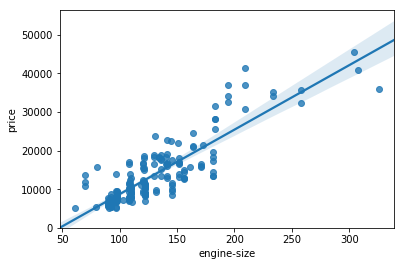

In [8]:
# Engine size como uma preditora potencial de price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

#### Correlação Linear Positiva: 
Quando engine-size sobe, o price sobe: isto indica uma correlação positiva direta entre duas variáveis.

Engine size apresenta-se como um bom preditor para price, mesmo que a linha de regressão não é uma linha diagonal perfeita.

### Correlação Linear Negativa

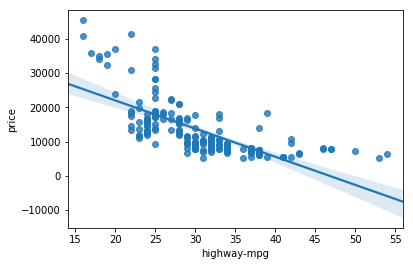

In [10]:
# Highway mpg como uma possível preditora de price
sns.regplot(x="highway-mpg", y="price", data=df)


#### Correlação linear negativa:

À medida que a variável highway-mpg sobe, o preço diminui: isso indica uma relação inversa / negativa entre essas duas variáveis.

Highway mpg poderia potencialmente ser um preditor de preço.


### Correlação linear fraca

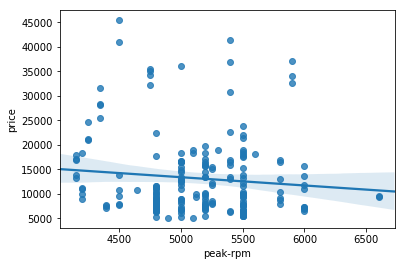

In [11]:
# Peak rpm como uma preditora da variável price
sns.regplot(x="peak-rpm", y="price", data=df)

#### Correlação Linear Fraca:

Peak rpm não parece um bom preditor de preço, uma vez que a linha de regressão é próxima da horizontal.
Além disso, os pontos de dados são muito dispersos e longe da linha ajustada, mostrando que há muita variabilidade e, portanto, não é uma variável confiável


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Questão  3 a): </h1>

<b> Encontre a correlação entre x="stroke", y="price".
<br>Dica: se você deseja selecionar essas colunas use a seguinte sintaxe: df[["stroke","price"]]</bbr>  </b>
</div>

 <div align="right">
<a href="#q3a" class="btn btn-default" data-toggle="collapse">clique aqui para solução</a>

</div>
<div id="q3a" class="collapse">
```
A correlação é 0.0823, os elementos não diagonais de uma tabela. 
code:df[["stroke","price"]].corr() 
```
</div>

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Questão  3 b): </h1>

<b> Dadas as correlações entre "price" e "stroke" você espera que a correlação linear performe bem?. Verifique seus resultados usando a função "regplot()".</bbr>  </b>
</div>

  <div align="right">
<a href="#q3b" class="btn btn-default" data-toggle="collapse">Clique aqui para solução</a>

</div>
<div id="q3b" class="collapse">
```
Há uma correlação linear fraca entre as variáveis stroke' e 'price.' Como essa regressão não funcionará bem. Podemos ver esse uso "regplot" para demonstrar isso.

Code: sns.regplot(x="stroke", y="price", data=df)
```
</div>


## Variáveis categóricas

São variáveis ​​que descrevem uma "característica" de uma unidade de dados e são selecionadas de um pequeno grupo de categorias.
As variáveis ​​categóricas podem ter o tipo "objeto" ou "int64".

Uma boa maneira de visualizar variáveis ​​categóricas é usando boxplots.

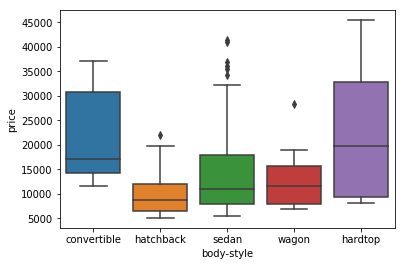

In [12]:
# elegendo a variável body-style
sns.boxplot(x="body-style", y="price", data=df)

Vemos que as distribuições de preços entre as diferentes categorias de estilo se sobrepõem as demais e, portanto, o estilo da caixa não seria um bom preditor de preço.

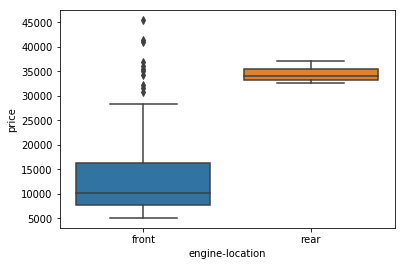

In [13]:
# engine-location
sns.boxplot(x="engine-location", y="price", data=df)

Aqui, vemos que a distribuição de preço entre essas duas categorias de engine-location, frente e traseira, são distintas o suficiente para levar a localização do motor como um bom preditor de preço.


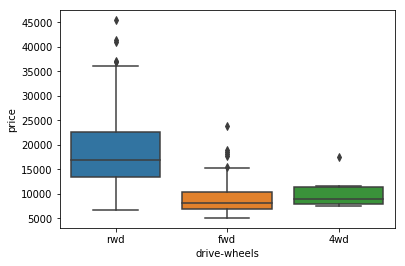

In [14]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)


Aqui, vemos que a distribuição do preço entre as diferentes categorias de rodas motrizes difere e, portanto, as rodas motrizes podem potencialmente ser um preditor de preço.


## 3. Análise Estatística Descritiva


Vamos primeiro dar uma olhada nas variáveis, utilizando um método de descrição.

A função "describe" calcula automaticamente estatísticas básicas para todas as variáveis ​​contínuas. Todos os valores de NaN são ignorados automaticamente nessas estatísticas.

Isso mostrará:

    A contagem dessa variável,
    A média,
    O desvio padrão (std),
    O valor mínimo,
    O IQR ou amplitude interquartil(Interquartile Range: 25%, 50% e 75%), e
    O valor máximo.

A configuração padrão de "describe" ignora as variáveis ​​categóricas, mas ainda podemos fazer análises básicas sobre elas usando descrevê-la passando as como um parâmetro.


In [15]:
# summary statistics using pandas method
df.describe()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,100.000000,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,58.167861,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,0.000000,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,50.000000,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,100.000000,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,150.000000,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,200.000000,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [16]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115



Imediatamente vemos que certas variáveis ​​categóricas seriam preditores muito pobres, porque são dominadas por uma única categoria. O tipo de combustível, por exemplo, é quase sempre gás. Outro preditor pobre é a localização do motor. A aspiração eo tipo de motor também podem ser preditores pobres.


### Valores de contagens

Value-counts é um bom caminho para entender quantas unidadede cada característica temos

In [17]:
# drive-wheels como variável
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts.head()

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [18]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [19]:
# engine-location como variável
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


Como podemos ver, considerando as contagens de valor da localização do motor, isso não seria uma boa variável de previsão para o preço, já que temos apenas 3 carros com motor traseiro e 198 com motor dianteiro, por isso é distorcido. Assim, não podemos tirar conclusões sobre a localização do motor.

## 4. Básico  de Agrupamento

A função groupby agrupa os dados por diferentes categorias de uma variável e a análise pode ser feita em dados de uma categoria inteira. Isso nos permite ver como uma variável afeta mais com mais clareza.

Você pode agrupar por uma variável. Por exemplo, vamos agrupar pela variável "drive-wheels". Vemos que existem 3 categorias diferentes de rodas motrizes

In [20]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)


Se quisermos saber, em média, qual o tipo de drive wheel é mais valioso, podemos agrupar as rodas motrizes e, em seguida, usá-las:

In [21]:
# Resultados de agrupamento
df_group_one=df[['drive-wheels','body-style','price']]
df_group_one=df_group_one.groupby(['drive-wheels'],as_index= False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


A partir de nossos dados, parece que os veículos com tração traseira são, em média, os mais caros, enquanto as rodas de 4-wheel e a front-wheel são próximas do mesmo preço.

Você também pode agrupar por múltiplas variáveis.

Por exemplo, vamos agrupar por "drive-wheels" e "body-style".

Isso agrupa o quadro de dados pelas combinações únicas dessas duas variáveis.

In [22]:
# resultados de agrupamentos
df_gptest=df[['drive-wheels','body-style','price']]
grouped_test1=df_gptest.groupby(['drive-wheels','body-style'],as_index= False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286



Este dado agrupado é muito mais fácil de visualizar quando é feito em uma tabela dinâmica. Uma tabela dinâmica é como uma planilha do Excel, com uma variável ao longo da coluna e outra ao longo da linha. Use a função de pivô para criar uma tabela dinâmica dos grupos.

Neste caso, iremos deixar a variável da drive-wheel como as linhas da tabela e girar o body-style para se tornar as colunas da tabela:


In [23]:
grouped_pivot=grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222


Muitas vezes, não teremos dados para algumas das células pivô. Isso não é bom para o que faremos depois. Vamos preencher essas células em falta com o valor 0, mas qualquer outro valor poderia ser usado também.


In [24]:
pd.options.display.float_format='R$ {:.2f}'.format
grouped_pivot=grouped_pivot.fillna(0) #preencha os casos faltantes com 0
grouped_pivot

price                                                
body-style   convertible     hardtop   hatchback       sedan       wagon
drive-wheels                                                            
4wd              R$ 0.00     R$ 0.00  R$ 7603.00 R$ 12647.33  R$ 9095.75
fwd          R$ 11595.00  R$ 8249.00  R$ 8396.39  R$ 9811.80  R$ 9997.33
rwd          R$ 23949.60 R$ 24202.71 R$ 14337.78 R$ 21711.83 R$ 16994.22

In [25]:
pd.reset_option("display.float_format")

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Questão 4 : </h1>

<b> Use a função "groupby" para encontrar o "preço" médio de cada carro com base em "body-style"  </b>
</div>

In [30]:
df[['price','body-style']].groupby(['body-style'],as_index= False).mean()


,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


<div align="right">
<a href="#q4" class="btn btn-default" data-toggle="collapse">Clique aqui para solução</a>

</div>
<div id="q4" class="collapse">
```
df[['price','body-style']].groupby(['body-style'],as_index= False).mean()
```
</div>


## 5. Correlação e Causalidade

**Correlação**: uma medida da extensão da interdependência entre as variáveis.

**Causalidade**: a relação entre causa e efeito entre duas variáveis.

É importante conhecer a diferença entre estes dois e essa correlação não implica causalidade. A ciência dos dados tende a ser melhor para encontrar uma correlação do que encontrar uma causalidade.

In [31]:
import matplotlib.pyplot as plt
% matplotlib inline 

### Variaáveis: Drive Wheels e Body Style vs Price

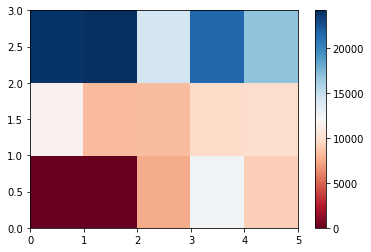

In [32]:
#use os dados agrupados
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()


Este é um mapa de calor, que traça a variável alvo (preço), pois variamos duas outras variáveis ​​(drive-wheel e body-style). Isso nos permite visualizar como o preço está relacionado à drive-wheel e ao body-style, além de ver se a drive-wheel e o corpo-corpo estão relacionados uns com os outros.
As etiquetas padrão não nos fornecem informações úteis. Vamos mudar isso:



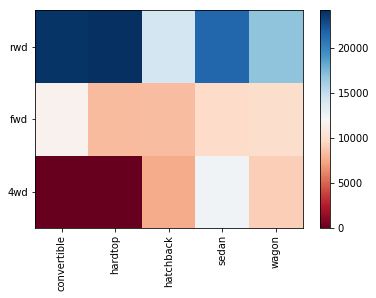

In [33]:
fig, ax=plt.subplots()
im=ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels=grouped_pivot.columns.levels[1]
col_labels=grouped_pivot.index
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

A visualização é muito importante na ciência dos dados, e os pacotes de visualização Python oferecem grande liberdade. Iremos mais aprofundadamente em um curso separado de visualizações de Python


A questão principal que queremos responder neste módulo é "Quais são as principais características que têm o maior impacto no preço do carro?".

Para obter uma melhor medida das características importantes, analisamos a correlação dessas variáveis ​​com o preço do carro, ou seja: como o preço do carro depende dessa variável?


##  Correlação Pearson

A Correlação de Pearson mede a dependência linear entre duas variáveis ​​X e Y.
O coeficiente resultante é um valor entre -1 e 1 inclusive, onde:



 ** 1 **: correlação linear positiva total,
-** 0 **: sem correlação linear, as duas variáveis ​​provavelmente não se afetam
-** - 1 **: correlação linear negativa total.

** Valor P **:
Qual é esse valor P? O valor P é o valor de probabilidade que a correlação entre essas duas variáveis ​​é estatisticamente significante. Normalmente, nós escolhemos um nível de significância de 0,05, o que significa que temos 95% de confiança em que a correlação entre as variáveis ​​é significativa.

Por convenção, quando o
- p-value é <0,001, dizemos que há uma forte evidência de que a correlação é significativa,
- p-valor é <0,05, há evidência moderada de que a correlação é significativa,
- o valor de p é <0,1, há evidências fracas de que a correlação é significativa e
- p-value is> 0.1, não há evidências de que a correlação seja significante.



In [35]:
from scipy import stats

### Wheel-base vs Price

In [36]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("O coeficiente de correlação de Pearson é", pearson_coef, " com um P-value  de P =", p_value)  

O coeficiente de correlação de Pearson é 0.5846418222655081  com um P-value  de P = 8.076488270732955e-20


##### Conclusão: 
Uma vez que o valor p é <0,001, a correlação entre a base da roda e o preço é estatisticamente significativa, embora o relacionamento linear não seja extremamente forte (~0.585)

### Horsepower vs Price

In [37]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("O coeficiente de correlação de Pearson é", pearson_coef, " com um P-value  de P =", p_value)   

O coeficiente de correlação de Pearson é 0.8095745670036559  com um P-value  de P = 6.36905742825998e-48


##### Conclusão:

Uma vez que o valor de p é <0,001, a correlação entre potência e preço é estatisticamente significativa e a relação linear é bastante forte (~ 0,809, perto de 1)

### Length vs Price

In [38]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("O coeficiente de correlação de Pearson é", pearson_coef, " com um P-value  de P =", p_value)   

O coeficiente de correlação de Pearson é 0.690628380448364  com um P-value  de P = 8.016477466159053e-30


##### Conclusão:
Uma vez que o valor p é <0,001, a correlação entre comprimento e preço é estatisticamente significativa e a relação linear é moderadamente forte (~ 0,691).

### Width vs Price

In [39]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("O coeficiente de correlação de Pearson é", pearson_coef, " com um P-value  de P =", p_value)  

O coeficiente de correlação de Pearson é 0.7512653440522674  com um P-value  de P = 9.200335510481426e-38


##### Conclusão:

Uma vez que o valor de p é <0,001, a correlação entre largura e preço é estatisticamente significativa e a relação linear é bastante forte (~ 0,751).

### Curb-weight vs Price

In [40]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print("O coeficiente de correlação de Pearson é", pearson_coef, " com um P-value  de P =", p_value)  

O coeficiente de correlação de Pearson é 0.8344145257702846  com um P-value  de P = 2.1895772388936997e-53


##### Conclusão:
Uma vez que o valor de p é <0,001, a correlação entre peso de freio e preço é estatisticamente significativa e a relação linear é bastante forte (~ 0,834).

### Engine-size vs Price

In [41]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("O coeficiente de correlação de Pearson é", pearson_coef, " com um P-value  de P =", p_value)  

O coeficiente de correlação de Pearson é 0.8723351674455185  com um P-value  de P = 9.265491622197996e-64


##### Conclusão:
Uma vez que o valor de p é <0,001, a correlação entre o tamanho do motor e o preço é estatisticamente significativa e a relação linear é muito forte (~ 0,872).

### Bore vs Price

In [42]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("O coeficiente de correlação de Pearson é", pearson_coef, " com um P-value  de P =", p_value)   

O coeficiente de correlação de Pearson é 0.5431553832626602  com um P-value  de P = 8.049189483935364e-17


##### Conclusão:
Uma vez que o valor de p é <0,001, a correlação entre o furo eo preço é estatisticamente significativa, mas a relação linear é apenas moderada (~ 0,521).

### City-mpg vs Price

In [43]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("O coeficiente de correlação de Pearson é", pearson_coef, " com um P-value  de P =", p_value)  

O coeficiente de correlação de Pearson é -0.6865710067844677  com um P-value  de P = 2.3211320655676368e-29


##### Conclusão:

Uma vez que o valor p é <0,001, a correlação entre cidade-mpg e preço é estatisticamente significativa e o coeficiente de ~ -0,687 mostra que a relação é negativa e moderadamente forte.

### Highway-mpg vs Price

In [44]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print("O coeficiente de correlação de Pearson é", pearson_coef, " com um P-value  de P =", p_value)  

O coeficiente de correlação de Pearson é -0.7046922650589529  com um P-value  de P = 1.7495471144476807e-31


##### Conclusão:

Uma vez que o valor de p é <0,001, a correlação entre rodovia-mpg e preço é estatisticamente significativa e o coeficiente de ~ -0,705 mostra que a relação é negativa e moderadamente forte.

## 6. ANOVA

###  ANOVA: Análise de Variância


Este é um método estatístico utilizado para testar se há diferenças significativas entre os meios de dois ou mais grupos. ANOVA retorna dois parâmetros:

F-pontuação de teste: ANOVA assume que os meios de todos os grupos são os mesmos, calcula o quanto os meios reais se desviam do pressuposto e o relatam como o resultado do teste F. Uma pontuação maior significa uma diferença maior entre os meios.

P-valor: já vimos isso ao calcular a correlação de Pearson. P-value conta como estatisticamente significativo é o nosso valor calculado de pontuação

Se a nossa variável de preço estiver fortemente correlacionada com a variável que estamos analisando, espera que ANOVA retorne um grande resultado de teste F e um pequeno valor de p.
Drive Wheels

Uma vez que ANOVA analisa a diferença entre diferentes grupos da mesma variável, a função groupby será útil. Como o algoritmo ANOVA mede os dados automaticamente, não precisamos levar a média antes da mão.

### Drive Wheels

Uma vez que ANOVA analisa a diferença entre diferentes grupos da mesma variável, a função groupby será útil. Como o algoritmo ANOVA mede os dados automaticamente, não precisamos levar a média antes da mão.

In [45]:
grouped_test2=df_gptest[['drive-wheels','price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [46]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [ ]:
# este pacote já foi importado anteriormente
# import scipy

#### All three groups together: 4wd, fwd, and rwd

In [47]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "Resultados de ANOVA: F=", f_val, ", P =", p_val)   

Resultados de ANOVA: F= 67.95406500780399 , P = 3.3945443577151245e-23


Este é um ótimo resultado, com um grande resultado de teste F com forte correlação e um valor de P quase 0 mostrando significância estatística quase certa. Mas isso significa que todos os 3 grupos testados estão todos altamente correlacionados?

#### Separately: fwd and rwd

In [48]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "Resultados de ANOVA: F=", f_val, ", P =", p_val )

Resultados de ANOVA: F= 130.5533160959111 , P = 2.2355306355677845e-23


#### 4wd and rwd

In [49]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "Resultados de ANOVA: F=", f_val, ", P =", p_val)   

Resultados de ANOVA: F= 8.580681368924756 , P = 0.004411492211225333


#### 4wd and fwd

In [50]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("Resultados de ANOVA: F=", f_val, ", P =", p_val)   

Resultados de ANOVA: F= 0.665465750252303 , P = 0.41620116697845666


## Conclusão: Variáveis importantes

Agora temos uma melhor idéia do que nossos dados se parecem e quais variáveis ​​são importantes para levar em consideração ao prever o preço do carro. Nós reduzimos isso às seguintes variáveis:

Variáveis ​​numéricas contínuas:

- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore

Variáveis Categoricas 
- Drive-wheels

Como nos movemos agora para a construção de modelos de aprendizado de máquinas para automatizar nossas análises, alimentar o modelo com variáveis ​​que afetam significativamente nossa variável alvo irá melhorar o desempenho de previsão do nosso modelo.

# Sobre os Autores:  

Este notebook foi escrito por [Mahdi Noorian PhD](https://www.linkedin.com/in/mahdi-noorian-58219234/) ,[Joseph Santarcangelo PhD]( https://www.linkedin.com/in/joseph-s-50398b136/), Bahare Talayian, Eric Xiao, Steven Dong, Parizad , Hima Vsudevan e [Fiorella Wenver](https://www.linkedin.com/in/fiorellawever/).

Adaptado por Cláudio Pinheiro https://www.linkedin.com/in/claudio-pinheiro-cloud
